In [32]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [33]:
import pandas as pd
import numpy as np

import pydotplus
import graphviz

In [81]:
# Settings Options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Options for Decimal Places
# We do this to avoid exponential form/representation of data that is big
pd.options.display.float_format = '{:.2f}'.format

In [82]:
df_BO = pd.read_csv("BackOrders.csv")

In [83]:
df_BO.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,15,1,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.00,0,0,0,0,0,0,0,0,0,No,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.00,10,10,77,184,46,132,256,365,47,No,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.00,0,0,0,0,1,2,6,9,1,No,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.00,0,4,6,10,2,2,5,6,0,No,0,0.97,0.92,0,No,No,No,Yes,No,No


In [84]:
# Check the dimensions
df_BO.shape

(61589, 23)

In [85]:
# Check the data types
df_BO.dtypes

# Always tally the data types with the Data Definition provided to check whether it is correct or not

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [86]:
df_BO.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [41]:
# See the summary statistics of the Numerical variables
df_BO.describe()

# This code gives the summary stats of only the numeric variables

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,61589.00,61589.00,58186.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00
mean,2037187.68,287.72,7.56,30.19,169.27,315.04,453.58,44.74,150.73,283.55,419.64,43.09,1.61,-6.26,-5.86,1.21
std,656417.82,4233.91,6.50,792.87,5286.74,9774.36,14202.01,1373.81,5224.96,8872.27,12698.58,959.61,42.31,25.54,24.84,29.98
min,1068628.00,-2999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,1498574.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.64,0.00
50%,1898033.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,6.00,0.00,0.00,0.82,0.80,0.00
75%,2314826.00,57.00,8.00,0.00,12.00,25.00,36.00,6.00,17.00,34.00,51.00,3.00,0.00,0.96,0.95,0.00
max,3284895.00,673445.00,52.00,170976.00,1126656.00,2094336.00,3062016.00,295197.00,934593.00,1799099.00,2631590.00,192978.00,7392.00,1.00,1.00,2999.00


In [42]:
# To see the summary stats of the categorical variables we need to use the following code

df_BO.describe(include = 'object')

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,61589,61589,61589,61589,61589,61589,61589
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,61509,48145,61577,53792,59303,61569,50296


In [43]:
# we can see that the 'sku' variable is not important as it only provides us with the product id
# Axis = 1 tells the drop() to search for the name in the columns
# So Drop the sku variable

# df_BO = df_BO.drop('sku', axis = 1)

# OR

df_BO.drop('sku', axis = 1, inplace = True)

In [44]:
# Check the missing values
df_BO.isnull().sum()*100/df_BO.shape[0]

# here in stead of 'df_BO.shape[0]' we can use 'len(df_BO)'

national_inv        0.00
lead_time           5.53
in_transit_qty      0.00
forecast_3_month    0.00
forecast_6_month    0.00
forecast_9_month    0.00
sales_1_month       0.00
sales_3_month       0.00
sales_6_month       0.00
sales_9_month       0.00
min_bank            0.00
potential_issue     0.00
pieces_past_due     0.00
perf_6_month_avg    0.00
perf_12_month_avg   0.00
local_bo_qty        0.00
deck_risk           0.00
oe_constraint       0.00
ppap_risk           0.00
stop_auto_buy       0.00
rev_stop            0.00
went_on_backorder   0.00
dtype: float64

In [45]:
# This is a very dangerous function
# This will drop all the rows that have NA at any location
# So we need to be careful while using this code as, if almost all the rows have even 1 missing value, they will be dropped.
# This will effect our data very much

df_BO = df_BO.dropna(axis=0)

In [46]:
df_BO.shape

(58186, 22)

In [47]:
# Exploratory Data Analysis is the key to our predictive modelling
# Feature engineering is another key component in predictive modelling

In [87]:
# To build a Decision tree model the following steps need to be followed:
 # 1. EDA
 # 2. Outlier Treatment
 # 3. Separate the numeric features(independent variables) and categorical features
 # 4. Standardize the numerical features (scaling/ standardizing teh numeric variable is optional) 
 # 5. and encoding the categorical features (this is very important and needs to be done)
 # 6. Concatenate the data

In [49]:
# perform encoding on Categorical variables

# Separate out the categorical variables
categorical_vars = df_BO.select_dtypes(include = ['object']).columns
print(categorical_vars)

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


In [50]:
# One hot encoding so we do not use drop_first = True
# Generally we do not use (n-1) dummy encoding in Decision tree
df_encoded = pd.get_dummies(columns = categorical_vars, data=df_BO)

# Please Note: We simply mention the categorical variables to the get_dummies()
# It keeps the numeric variables as-is and encodes the categorical vraiable
# So we do not need to explicitely concatenate numeric and encoded variables 

In [51]:
df_encoded.head(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_No,potential_issue_Yes,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes,went_on_backorder_No,went_on_backorder_Yes
1,7,2.00,0,0,0,0,0,0,0,0,0,0,0.50,0.28,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
2,258,15.00,10,10,77,184,46,132,256,365,47,0,0.54,0.70,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
3,46,2.00,0,0,0,0,1,2,6,9,1,0,0.75,0.90,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
4,2,2.00,0,4,6,10,2,2,5,6,0,0,0.97,0.92,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
5,297,12.00,0,0,0,0,5,6,44,57,3,0,0.58,0.75,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
6,3285,8.00,0,0,0,0,18,81,162,304,37,0,0.61,0.57,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
7,6,2.00,0,0,3,9,1,5,8,13,0,0,0.86,0.77,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1
8,99,8.00,0,46,169,225,2,22,176,263,21,0,0.11,0.37,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
9,52,2.00,0,0,0,0,0,0,0,0,0,0,0.83,0.69,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
11,0,12.00,0,8,11,17,0,3,10,13,1,0,0.78,0.78,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1


In [52]:
# We did an error while encoding. We did not separate the categorical variable while encoding and so the categorical variable has also been encoded.
# We only need to keep one of the columns of the Binary encoding. As what is available in oneof them will be unavailable in the other and vice-versa

In [53]:
# Drop the target to have a dataframe only with the independent variables
df_encoded.drop('went_on_backorder_No', axis = 1, inplace = True)

In [54]:
# Let's see the distribution of the target variable
df_encoded['went_on_backorder_Yes'].value_counts()

0    47217
1    10969
Name: went_on_backorder_Yes, dtype: int64

In [88]:
# Let's see the distribution of the target variable
df_encoded['went_on_backorder_Yes'].value_counts(normalize=True)

0   0.81
1   0.19
Name: went_on_backorder_Yes, dtype: float64

In [55]:
# We separate the independent and the dependent variable
df_target = df_encoded['went_on_backorder_Yes']
df_independent = df_encoded.drop('went_on_backorder_Yes', axis = 1)

In [58]:
# Perform Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_independent, df_target, random_state = 1, test_size = 0.3)

# We took test size of 0.3 or 30% because we have a pretty large dataset and we would like to give more data for training.

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40730, 27)
(17456, 27)
(40730,)
(17456,)


In [201]:
from sklearn import tree
# For algorithms which can be used for both classification and regression,
# sklearn provides us with different modules

model_tree = tree.DecisionTreeClassifier(max_depth=7, criterion="entropy")
# We use Decision Tree Classifier as our target variable is Categorical in nature
model_DT = model_tree.fit(X_train, y_train)

In [174]:
# Hyper-parameters:

# criterion = 'gini' - it is one of the measure of impurity 
# 'gini' used for dichotomous categorical target variable 

# criterion = 'entropy' - it is one of the measures for impurity
# 'entropy' used for multi-class (2 or more) categorical variable

# max_depth: The maximum depth of the tree
# if set to "None", then nodes are expanded until all leaves are pure or 
# all leaves contain less than min_sample_split

# max_features = None
# the number of features to consider for the tree

# max_leaf_nodes = None
# how many nodes do you want in the tree to exist

# min_samples_leaf - minimum number of observations required in each leaf

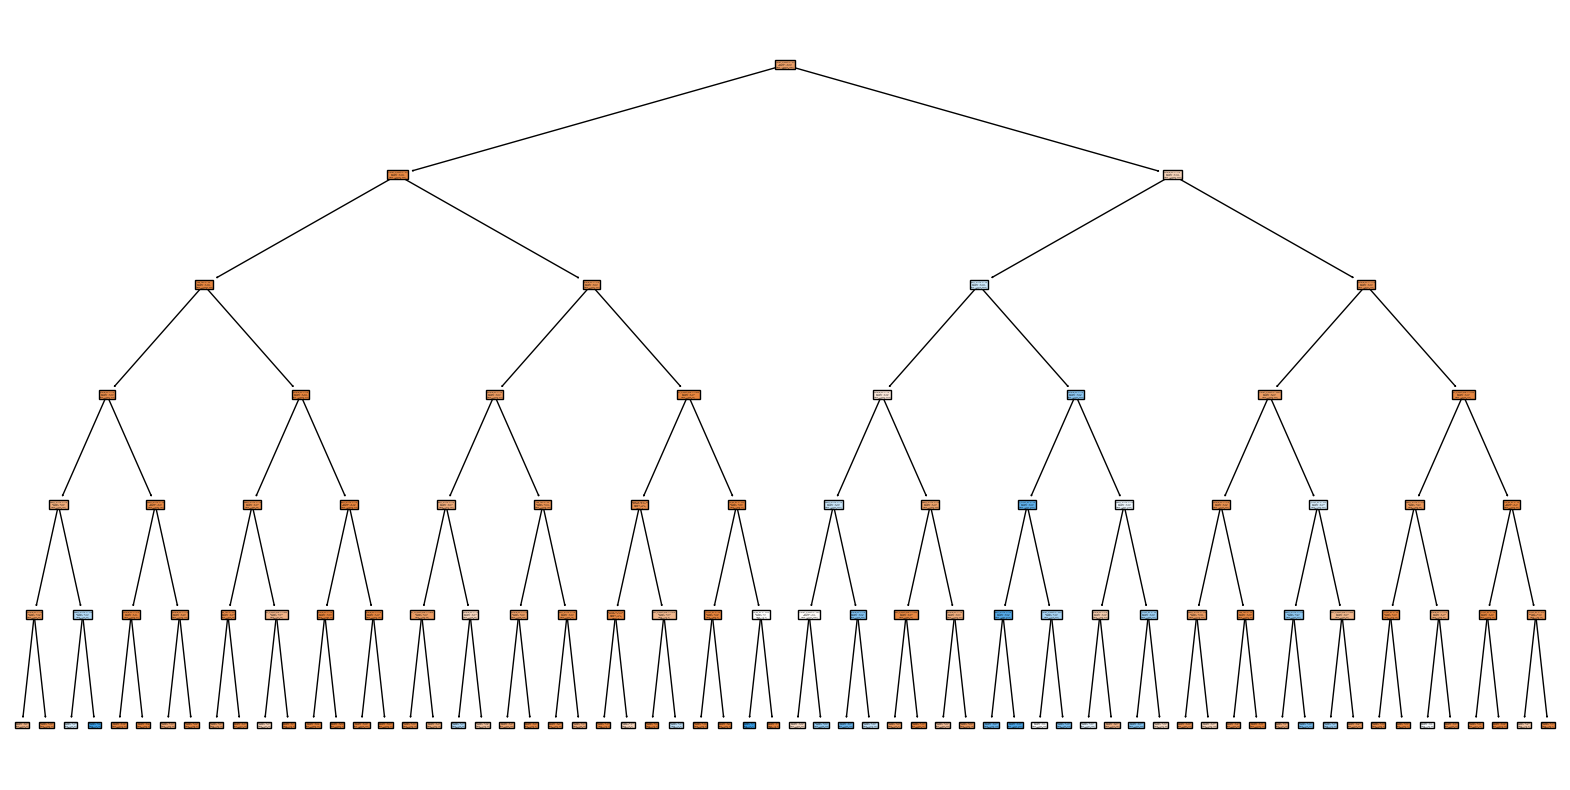

In [175]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have already trained your Decision Tree model and named it model_DT
# Replace X_train with your actual training data and labels with the feature names
labels = X_train.columns

plt.figure(figsize=(20, 10))
tree.plot_tree(model_DT, feature_names=labels, class_names=["0", "1"], filled=True)
plt.show()

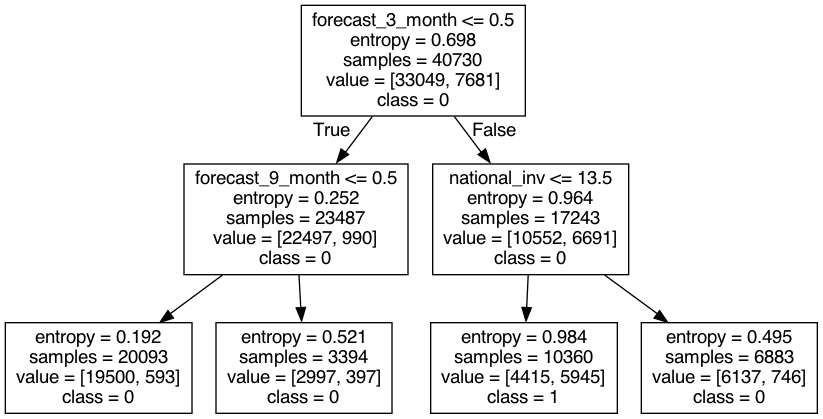

In [141]:
from IPython.display import Image

labels = X_train.columns

tree_viz = tree.export_graphviz(model_DT, feature_names = labels, class_names = ["0","1"])

graph = pydotplus.graph_from_dot_data(tree_viz)
Image(graph.create_png())

In [202]:
train_pred = model_DT.predict(X_train)
test_pred = model_DT.predict(X_test)

In [203]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, train_pred) 
test_cm = confusion_matrix(y_test, test_pred)

In [204]:
print(train_cm)
print(test_cm)

[[31611  1438]
 [ 2580  5101]]
[[13489   679]
 [ 1168  2120]]


In [205]:
print(train_cm)

[[31611  1438]
 [ 2580  5101]]


32220 => 0, 0

829 => 0, 1

4608 => 1, 0

3073 => 1, 1

In [206]:
accuracy_train = (train_cm[0,0] + train_cm[1,1]) / (train_cm[0,0] + train_cm[0,1] + train_cm[1,0] + train_cm[1,1])
print(accuracy_train)

0.9013503560029462


In [207]:
accuracy_test = (test_cm[0,0] + test_cm[1,1]) / (test_cm[0,0] + test_cm[0,1] + test_cm[1,0] + test_cm[1,1])
print(accuracy_test)

0.8941911090742438


In [208]:
# Train Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     33049
           1       0.78      0.66      0.72      7681

    accuracy                           0.90     40730
   macro avg       0.85      0.81      0.83     40730
weighted avg       0.90      0.90      0.90     40730



In [209]:
# Test Classification Report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14168
           1       0.76      0.64      0.70      3288

    accuracy                           0.89     17456
   macro avg       0.84      0.80      0.82     17456
weighted avg       0.89      0.89      0.89     17456



In [ ]:
Question: Calculate the Sensitivity, Specificity and Precision on Test Result